### Face detection 

In [2]:
import cv2
import face_recognition as face
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
list_img = glob.glob('facev21/dataset/*.jpg')
list_img[1]

'facev21/dataset/img39.jpg'

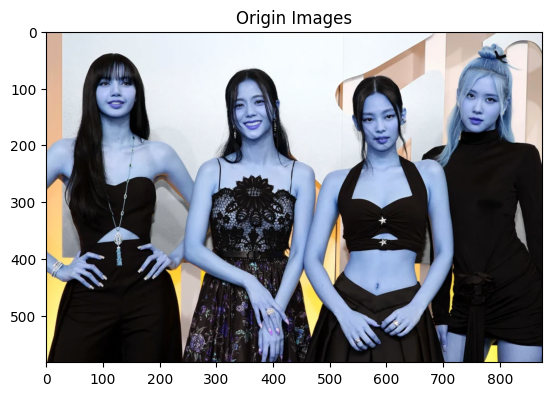

In [4]:
img_detect = cv2.imread('img/blackpink.jpg')
plt.imshow(img_detect)
plt.title('Origin Images')
plt.show()

There are 4 face(s) in this picture
Found face 1 at location T 96 R 801 B 171 L 726


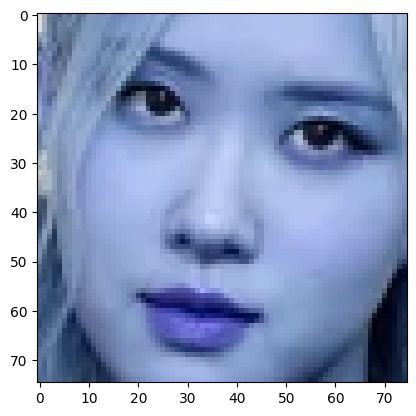

(75, 75, 3)
Found face 2 at location T 130 R 627 B 204 L 552


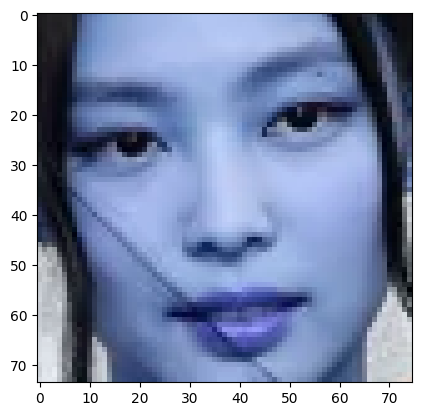

(74, 75, 3)
Found face 3 at location T 105 R 395 B 179 L 320


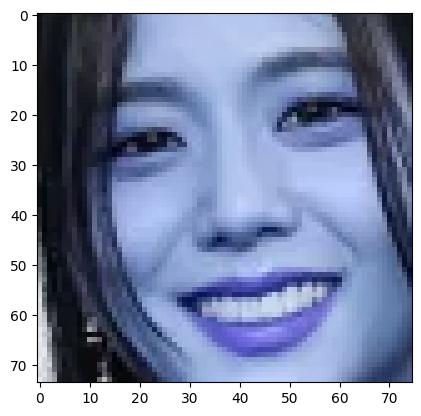

(74, 75, 3)
Found face 4 at location T 66 R 165 B 156 L 76


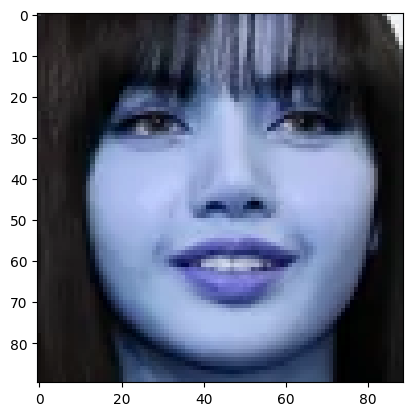

(90, 89, 3)


In [5]:
locations_faces = face.face_locations(img_detect, model='hog')
print('There are {} face(s) in this picture'.format(len(locations_faces)))
for index, current_face in enumerate(locations_faces):
    top, right, bottom, left = current_face
    print('Found face {} at location T {} R {} B {} L {}'.format(index+1, top, right, bottom, left))
    face_image = img_detect[top:bottom, left:right]
    plt.imshow(face_image)
    plt.show()
    print(face_image.shape)

### Face detection realtime

In [6]:
import cv2
import face_recognition as face
import matplotlib.pyplot as plt
import numpy as np


In [7]:


webcam_video_stream = cv2.VideoCapture(0)
face_location = []
while True: 
    # get current frame form the live video
    ret, current_frame = webcam_video_stream.read()
    # resize to 1/4 to process faster
    current_frame_small =  cv2.resize(current_frame, (0, 0), fx=.25, fy=.25)
    face_location = face.face_locations(current_frame_small, number_of_times_to_upsample=2, model='ssd')
    for index, current_face_location in enumerate(face_location):
        # print(current_face_location)
        top, right, bottom, left = np.array(current_face_location) * 4
 
        # print('Found face {} at location T {} R {} B {} L {}'.format(index+1, top, right, bottom, left))
        cv2.rectangle(current_frame, (left, top), (right, bottom), (0,0,255), 2)
    if len(face_location) > 0:
        cv2.imwrite('img/khoa-thien.png', current_frame)
        
    cv2.imshow('Webcam',current_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        # breaking the loop if the user types q
        # note that the video window must be highlighted!
        break
    
webcam_video_stream.release() 
cv2.destroyAllWindows() 
cv2.waitKey(1)
    
        

[ WARN:0@38.601] global /io/opencv/modules/videoio/src/cap_v4l.cpp (902) open VIDEOIO(V4L2:/dev/video0): can't open camera by index


error: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


### Face recognition

In [1]:
import cv2
import face_recognition as face
import matplotlib.pyplot as plt
import numpy as np


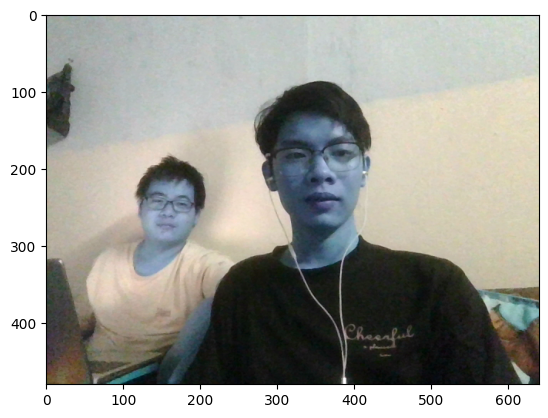

In [2]:
origin_img = cv2.imread('img/khoa-thien.png')
plt.imshow(origin_img)

In [87]:

origin_img = cv2.imread('img/khoa-thien.png')

thien_img = face.load_image_file('img/jisoo.png')
thien_embedding = face.face_encodings(thien_img)

khoa_img = face.load_image_file('img/lisa.png')
khoa_embedding = face.face_encodings(khoa_img)

vinh_img = face.load_image_file('img/vinh.png')
vinh_embedding = face.face_encodings(vinh_img)

known_face_encodings = [thien_embedding[0], khoa_embedding[0]]
known_face_names = ['Thien', 'Khoa', 'Vinh']

(2, 128)
(2, 128)


-1

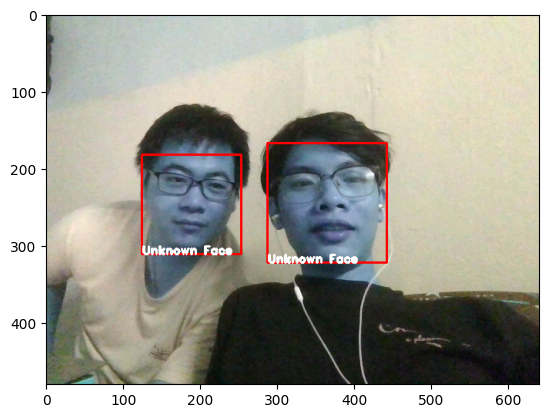

In [88]:

# load unknown img to recognition 
img_unknown = face.load_image_file('img/khoa-thien.png')

# detect all face in img
all_face_locations = face.face_locations(img_unknown, model='hog')
all_face_encodings = face.face_encodings(img_unknown, all_face_locations)

for c_face_location, c_face_encoding in zip(all_face_locations, all_face_encodings):
    top, right, bottom, left = c_face_location
    all_matches = face.compare_faces(known_face_encodings, c_face_encoding, tolerance=0.5)
    print(np.array(all_face_encodings).shape)
    name_of_person = "Unknown Face"
    
    if True in all_matches:
        first_match_index = all_matches.index(True)
        name_of_person = known_face_names[first_match_index]
    
    cv2.rectangle(origin_img, (left, top), (right, bottom), (255, 0, 0), 2)
    
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(origin_img, name_of_person, (left, bottom), font, 0.5, (255, 255, 255), 2)
    
    plt.imshow(origin_img)
    
cv2.destroyAllWindows() 
cv2.waitKey(1)

In [ ]:
thien_img = face.load_image_file('img/thien.png')
thien_embedding = face.face_encodings(thien_img)

khoa_img = face.load_image_file('img/khoa.png')
khoa_embedding = face.face_encodings(khoa_img)

In [47]:
all_face_encodings = face.face_encodings(img_unknown, all_face_locations)
np.array(all_face_encodings).shape

(2, 128)

In [48]:
all_face_encodings = np.array(all_face_encodings)

In [49]:
all_face_encodings.shape

(2, 128)

In [51]:
np.linalg.norm(thien_embedding - all_face_encodings[1], axis=1)

array([0.41701636])

### Face Recognition Realtime

In [76]:
import cv2
import face_recognition as face
import matplotlib.pyplot as plt
import numpy as np


In [91]:

thien_img = face.load_image_file('img/thien.png')
thien_embedding = face.face_encodings(thien_img)

khoa_img = face.load_image_file('img/jisoo.png')
khoa_embedding = face.face_encodings(khoa_img)

vinh_img = face.load_image_file('img/lisa.png')
vinh_embedding = face.face_encodings(vinh_img)

known_face_encodings = [thien_embedding[0], khoa_embedding[0], vinh_embedding[0]]
known_face_names = ['Thien', 'Jisoo', 'Lisa']

len(known_face_encodings)

3

In [93]:
webcam_video_stream = cv2.VideoCapture(0)


face_location = []
face_encoding = []
face_name = []

while True: 
    # get current frame form the live video
    ret, current_frame = webcam_video_stream.read()
    # resize to 1/4 to process faster
    current_frame_small =  cv2.resize(current_frame, (0, 0), fx=.25, fy=.25)
    face_location = face.face_locations(current_frame_small, number_of_times_to_upsample=2, model='hog')
    face_encoding = face.face_encodings(current_frame_small, face_location)
    
    for current_face_location, current_face_encoding in zip(face_location, face_encoding):
        top, right, bottom, left = np.array(current_face_location) * 4

        all_matchs = face.compare_faces(known_face_encodings, current_face_encoding, tolerance=0.5)
        
        name_of_person = "Unknown Face"
        
        print(all_matches)
    
        if True in all_matches:
            first_match_index = all_matches.index(True)
            name_of_person = known_face_names[first_match_index]
        
        cv2.rectangle(current_frame, (left, top), (right, bottom), (255, 0, 0), 2)
        
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(current_frame, name_of_person, (left, bottom), font, 0.5, (255, 255, 255), 2)
    
        cv2.imshow('Webcam',current_frame)
        
    if cv2.waitKey(1) & 0xFF == ord('q'):
        # breaking the loop if the user types q
        # note that the video window must be highlighted!
        break
    
webcam_video_stream.release() 
cv2.destroyAllWindows() 
cv2.waitKey(1)
    
        

[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, False]
[False, Fa

-1

### Face Landmarks Visualization

In [2]:
import cv2
import face_recognition as face
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw

In [17]:
img = face.load_image_file('img/khoa-thien.png')
# Find landmarks 
face_landmarks_list = face.face_landmarks(img)

In [19]:
pil_image = Image.fromarray(img)
d = ImageDraw.Draw(pil_image)
for ind in range(len(face_landmarks_list)):
    for landmarks in face_landmarks_list:
        # convert the numpy array to PIL object
        d.line(landmarks['chin'], fill=(255, 255, 255), width=2)
        d.line(landmarks['left_eyebrow'], fill=(255, 255, 255), width=2)
        d.line(landmarks['right_eyebrow'], fill=(255, 255, 255), width=2)
        d.line(landmarks['nose_bridge'], fill=(255, 255, 255), width=2)
        d.line(landmarks['nose_tip'], fill=(255, 255, 255), width=2)
        d.line(landmarks['left_eye'], fill=(255, 255, 255), width=2)
        d.line(landmarks['right_eye'], fill=(255, 255, 255), width=2)
        d.line(landmarks['top_lip'], fill=(255, 255, 255), width=2)
        d.line(landmarks['bottom_lip'], fill=(255, 255, 255), width=2)
    
    pil_image.show()   

### Face Landmarks Realtime

In [2]:
import cv2
import face_recognition as face
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw

In [3]:
web_cam_video = cv2.VideoCapture(0);

while True:
    
    ret, frame = web_cam_video.read()
    # current_frame_small = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)
    
    face_landmarks_list = face.face_landmarks(frame)
    
    pil_image = Image.fromarray(frame)
    
    d = ImageDraw.Draw(pil_image)
    
    for index in range(len(face_landmarks_list)):
        for landmarks in face_landmarks_list:
            d.line(landmarks['chin'], fill=(255, 255, 255), width=2)
            d.line(landmarks['left_eyebrow'], fill=(255, 255, 255), width=2)
            d.line(landmarks['right_eyebrow'], fill=(255, 255, 255), width=2)
            d.line(landmarks['nose_bridge'], fill=(255, 255, 255), width=2)
            d.line(landmarks['nose_tip'], fill=(255, 255, 255), width=2)
            d.line(landmarks['left_eye'], fill=(255, 255, 255), width=2)
            d.line(landmarks['right_eye'], fill=(255, 255, 255), width=2)
            d.line(landmarks['top_lip'], fill=(255, 255, 255), width=2)
            d.line(landmarks['bottom_lip'], fill=(255, 255, 255), width=2)

    rgb_img = pil_image.convert("RGB")
    rgb_open_cv = np.array(pil_image)
    
    bgr_open_cv = cv2.cvtColor(rgb_open_cv, cv2.COLOR_RGB2BGR)
    bgr_open_cv = bgr_open_cv[:,:,::-1].copy()
    
    cv2.imshow('Webcam video',bgr_open_cv)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
web_cam_video.release()
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/ngocthien/anaconda3/envs/deep/lib/python3.9/site-packages/cv2/qt/plugins"


### MTCNN for face detection

MTCNN mean Multi-task cascade CNN
- Consist three network
<ul> 
    <li> 
        P-Net (Proposal network)
        <ul> 
            <li> Create multiple frame which scans through the entire image </li>
        </ul>
    </li>
    <li>
        R-Net (Refinement network) 
        <ul> 
            <li> Discards frame which do not contain faces </li>
        </ul>
    </li>
    <li> 
        O-Net (Output network) 
        <ul> 
            <li> Outputs the facial landmark position </li>
        </ul>
    </li>
</ul>

In [2]:
import cv2
import face_recognition as face
import matplotlib.pyplot as plt
import numpy as np
from mtcnn.mtcnn import MTCNN

In [3]:

img_to_detect = plt.imread('img/blackpink.jpg')
# create a instance of mtcnn
mtcnn_detector = MTCNN()

all_face_locations = mtcnn_detector.detect_faces(img_to_detect)
print("There are {} face's in picture".format(len(all_face_locations)))
print(all_face_locations)
for index, face in enumerate(all_face_locations):
    x, y, width, height = face['box']
    left_x, left_y= x, y
    right_x, right_y = x + width, y + height
    current_img = img_to_detect[left_y: right_y, left_x:right_x]
    cv2.imshow("Face no {}".format(index), current_img)
    cv2.rectangle(img_to_detect, (left_x, left_y), (right_x, right_y), (0, 255, 2), 2)
    keypoints = face['keypoints']
    cv2.circle(img_to_detect, (keypoints['left_eye']), 5, (0, 255, 1), 1)
    cv2.circle(img_to_detect, (keypoints['right_eye']), 5, (0, 255, 1), 1)
    cv2.circle(img_to_detect, (keypoints['nose']), 5, (0, 255, 1), 1)
    cv2.circle(img_to_detect, (keypoints['mouth_left']), 5, (0, 255, 1), 1)
    cv2.circle(img_to_detect, (keypoints['mouth_right']), 5, (0, 255, 1), 1)
    
    
cv2.imshow("Origin Image", img_to_detect)
cv2.waitKey(0)
cv2.destroyAllWindows()
    

2022-10-29 19:08:04.585885: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ngocthien/anaconda3/envs/deep/lib/python3.9/site-packages/cv2/../../lib64:
2022-10-29 19:08:04.586051: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-29 19:08:04.586063: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Hermes): /proc/driver/nvidia/version does not exist
2022-10-29 19:08:04.586419: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flag

1/1 [==============================] - 0s 83ms/step
There are 4 face's in picture
[{'box': [555, 111, 72, 103], 'confidence': 0.9999754428863525, 'keypoints': {'left_eye': (571, 155), 'right_eye': (605, 150), 'nose': (589, 173), 'mouth_left': (579, 190), 'mouth_right': (606, 187)}}, {'box': [87, 58, 72, 90], 'confidence': 0.9998679161071777, 'keypoints': {'left_eye': (105, 91), 'right_eye': (141, 90), 'nose': (122, 108), 'mouth_left': (108, 126), 'mouth_right': (139, 126)}}, {'box': [731, 71, 73, 107], 'confidence': 0.9979633092880249, 'keypoints': {'left_eye': (749, 114), 'right_eye': (784, 121), 'nose': (761, 139), 'mouth_left': (744, 152), 'mouth_right': (772, 158)}}, {'box': [328, 88, 69, 100], 'confidence': 0.9971216320991516, 'keypoints': {'left_eye': (342, 130), 'right_eye': (374, 124), 'nose': (360, 146), 'mouth_left': (347, 162), 'mouth_right': (381, 158)}}]


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/ngocthien/anaconda3/envs/deep/lib/python3.9/site-packages/cv2/qt/plugins"


In [6]:
keypoints = face['keypoints']
keypoints

{'left_eye': (342, 130),
 'right_eye': (374, 124),
 'nose': (360, 146),
 'mouth_left': (347, 162),
 'mouth_right': (381, 158)}

### VGG verifications

In [4]:
import cv2
import face_recognition as face
import matplotlib.pyplot as plt
import numpy as np
from mtcnn.mtcnn import MTCNN

In [ ]:
def detect_extract_face(img_path):
    img_to_detect = plt.imread(img_path)
    # create a instance of mtcnn
    mtcnn_detector = MTCNN()

    all_face_locations = mtcnn_detector.detect_faces(img_to_detect)
    print("There are {} face's in picture".format(len(all_face_locations)))
    print(all_face_locations)
    for index, face in enumerate(all_face_locations):
        x, y, width, height = face['box']
        left_x, left_y= x, y
        right_x, right_y = x + width, y + height
        current_img = img_to_detect[left_y: right_y, left_x:right_x]

    